## Principal Component Analysis Using Numpy and Pandas

In this notebook, I have executed Principle Component Analysis from scratch

### Load the Data and Libraries
---

In [1]:
#Importing the relevant libraries
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#Setting plot styles
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (12,8)

In [3]:
# data URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
                  header = None)
iris.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Principle Component Analysis or PCA is a very popular linear transformation tool that is often used in dimensionality reduction for machine learning algorithms. In a lot of machine learning problems, the data is often high dimensional(eg: images, bag of words description, etc). These representations are extremely high dimensional. Thus, we cannot expect the training data to densely populate this high dimensional space.So, there will be large parts of this space which will not be informative due to unavailability of data. In such cases, we seek to find a lower representation of this dimensional data.Thus, even thought the individual data elements are high dimensional, the distribution of data is relatively concentrated(PCA).

Here, we project a high dimensional data point to a lower dimensional space. LDA(Linear Discriminant Analysis) and PCA both transform the data and project it onto a linear subspace.

PCA gives us the directions of the data vectors, which maximizes the variance of the data. PCA projects the entire data set onto a different feature space.

About the data :
- 0: Length of the Sepal
- 1: Sepal Width
- 2: Petal Length
- 3: Petal Width
- 4 : Flower Class (Y)

In [4]:
iris.columns =["sepal_length","sepal_width","petal_length","petal_width","species"]
iris.dropna(how='all',inplace = True)# Drop the rows that have all NA values
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


### Visualize the Data
---

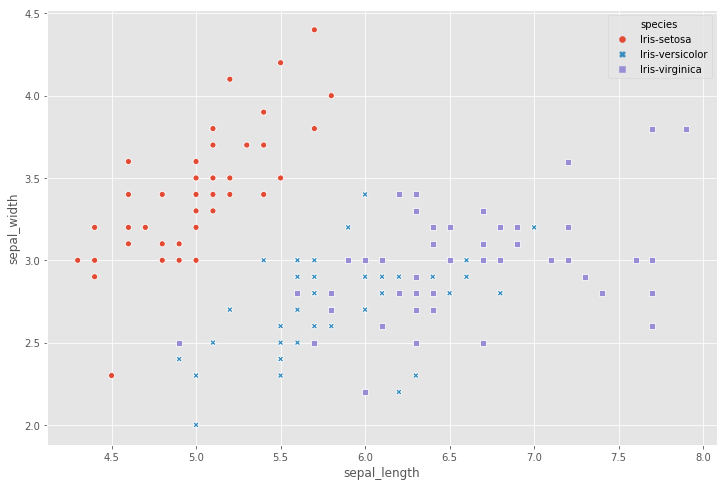

In [6]:
sns.scatterplot(x = iris.sepal_length, y = iris.sepal_width,hue = iris.species,
               style = iris.species)

From this distribution we can clearly see that for iris-setosa, usually the sepal lengths are shorter and widths are longer, the opposite of this being true for Iris-virginica.

### Standardize the Data
---

In [7]:
# Here, we subtract the mean from each feature value.
X = iris.iloc[:,0:4].values
y = iris.species.values

In [8]:
#Standardizing our data
#Replacing each feature value by (feature_value - mean)/std_dev. This ensures 0 mean and unit
#variance for each feature
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)

### Compute the Eigenvectors and Eigenvalues
---

Covariance: $\sigma_{jk} = \frac{1}{n-1}\sum_{i=1}^{N}(x_{ij}-\bar{x_j})(x_{ik}-\bar{x_k})$

Coviance matrix: $Σ = \frac{1}{n-1}((X-\bar{x})^T(X-\bar{x}))$

PCA aims to find linearly uncorrelated orthogonal axes also called Principle Components. It projects the data points onto these PCs in the n-dimensional space. First PC captures the largest variance in the data along that axis. Principle Components can be determined via a method called Eigen Decomposition.
- Step 1: Create a covariance matrix
- Step 2: Decomposition into Eigen vectors and values

In [9]:
covariance_matrix = np.cov(X.T)
print("Covariance Matrix : \n", covariance_matrix)

Covariance Matrix : 
 [[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


We can prove this by looking at the covariance matrix. It has the property that it is symmetric. We also constrain the each of the columns (eigenvectors) such that the values sum to one. Thus, they are orthonormal to each other.

Eigendecomposition of the covariance matrix:  $Σ = W\wedge W^{-1}$

In [10]:
#W -> Eigenvector, each column is one principle component, basis vectors that give orthogonal
#directions in the new space
#Lambda -> Diagonal matrix, where non-zero entries are the eigen values, these values tell how
#much to stretch along a particular space axis

eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [11]:
print("Eigenvectors : \n", eigen_vectors, "\n") # Look-column wise for each PC
print("Eigenvalues: \n",eigen_values)

Eigenvectors : 
 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]] 

Eigenvalues: 
 [2.93035378 0.92740362 0.14834223 0.02074601]


### Singular Value Decomposition (SVD)
---

In [12]:
eigen_vec_svd, s, v = np.linalg.svd(X.T)
eigen_vec_svd

array([[-0.52237162, -0.37231836,  0.72101681,  0.26199559],
       [ 0.26335492, -0.92555649, -0.24203288, -0.12413481],
       [-0.58125401, -0.02109478, -0.14089226, -0.80115427],
       [-0.56561105, -0.06541577, -0.6338014 ,  0.52354627]])

In [13]:
#Aim : Select a subset of features in the data that explain most of the variance

### Picking Principal Components Using the Explained Variance
---

In [14]:
#Eigen decomposition returns 4 Eigen vectors and 4 Eigen values. How we choose the PCs depends 
#on the way we sort the eigen values (descending order) and then pick the top k
#using "explained - variance"

In [15]:
for val in eigen_values:
    print(val) # sorted in descending order

2.9303537755893174
0.9274036215173421
0.14834222648163944
0.020746013995595943


In [16]:
#Now, we want to see how much of the variance in our data is explained by each of these 
#above displayed components

In [17]:
#We usually want our principle components to explain 90-95% of the data

In [18]:
variance_explained = [(i/sum(eigen_values))*100 for i in eigen_values]
variance_explained

[72.77045209380134, 23.03052326768065, 3.6838319576273775, 0.5151926808906323]

In [19]:
#Insight : First principle component explains 72.77% of the variance in our data and so on

In [21]:
cumulative_variance_explained = np.cumsum(variance_explained)
cumulative_variance_explained

array([ 72.77045209,  95.80097536,  99.48480732, 100.        ])

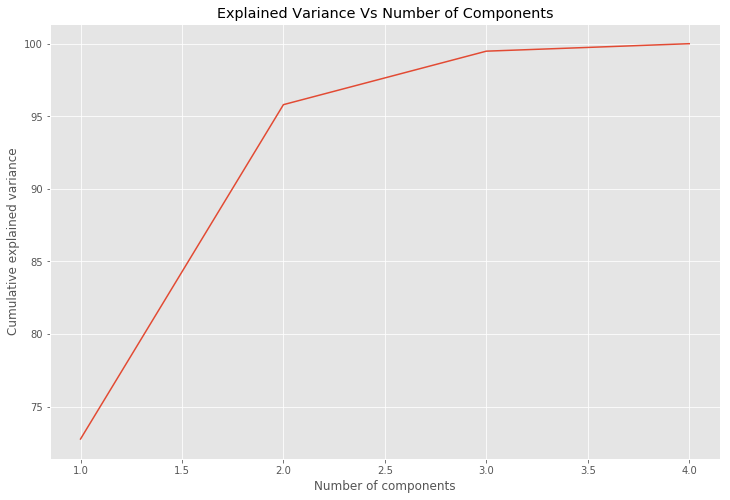

In [24]:
sns.lineplot(x = [1,2,3,4],y = cumulative_variance_explained) # When 1 component is used, when first 2 , when first 3 and 
#when all four
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("Explained Variance Vs Number of Components")
plt.show()

### Project Data Onto Lower-Dimensional Linear Subspace
---

In [25]:
# Lets use the first two principle components 
#Xpca = X.W

eigen_vectors

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

In [26]:
projection_matrix = (eigen_vectors.T[:][:])[:2].T
print("Projection Matrix: \n", projection_matrix)

Projection Matrix: 
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


In [27]:
X_pca = X.dot(projection_matrix)

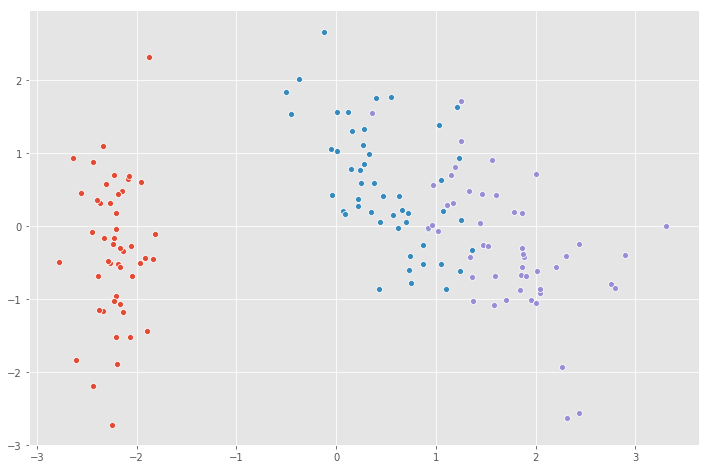

In [28]:
for species in ('Iris-setosa','Iris-versicolor','Iris-virginica'):
    sns.scatterplot(X_pca[y==species, 0],
                   X_pca[y==species,1]
                   )

In [29]:
#Better class separability in the above graph after using PCA


In [ ]:
#Summary :
#I started of with the Iris dataset imported using Pandas, explored the dataset a little bit, 
#gave meaningful names to each column, visualised the data graphically using a scatterplot,
#found that it was difficult separating classes('Iris-versicolor','Iris-virginica') 
#if they were not colored.
#Then, I first standardized the data by zeroing out the mean and scaling the data to a unit
#variance using StandardScaler method of sklearn.preprocessing. Following this, I computed the
#eigen vectors and values(by decomposing the covariance matrix using np.linalg) two ways :
#1)Eigen decomposition and 2)SVD(more efficient)

# Then I selected a subset of those components(projection_matrix) using cumulative variance
#explained.
#After setting a threshold of 95%, the first two components, explain more than 95% of the 
#variance in our data

# To calculate the pca transformed data, I took the dot product between the projection_matrix
#and the original data(X)
#Upon replotting this new data, we can see a lower dimensional representation(2D) of clearly 
#defined boundaries around separate classes

#Eventually, X_pca is the data that we feed to our classification algorithm and use X
#as input to our baseline model 